In [2]:
import pandas as pd

In [3]:
df_cell_blind = pd.read_csv('../data/drug_sensitivity_lung_CellBlind_test&prediction.csv')
print(df_cell_blind.shape)
df_cell_blind.head()

(12630, 6)


,Unnamed: 0,drug,cell_line,IC50,OncotreeCode,prediction
0,0,5-Fluorouracil,OPM2,3.454205,PCM,3.180841
1,1,5-azacytidine,OPM2,1.412405,PCM,2.575887
2,2,A-366,OPM2,3.899873,PCM,3.786826
3,3,ABT737,OPM2,1.208203,PCM,-2.233765
4,4,AGI-5198,OPM2,3.522023,PCM,3.753544


In [4]:
# 筛选出OncotreeCode为LUAD、LUSC、SCLC、NSCLC、LCLC的数据
df_LUNG = df_cell_blind[df_cell_blind['OncotreeCode'].isin(['LUAD', 'LUSC', 'SCLC', 'NSCLC', 'LCLC'])]
print(df_LUNG.shape)
df_LUNG.head()

(3138, 6)


,Unnamed: 0,drug,cell_line,IC50,OncotreeCode,prediction
9492,9492,5-Fluorouracil,HCC827,5.191741,LUAD,5.472933
9493,9493,5-azacytidine,HCC827,3.595454,LUAD,4.412920
9494,9494,A-366,HCC827,6.028838,LUAD,5.417455
9495,9495,ABT737,HCC827,4.389625,LUAD,2.832198
9496,9496,AGI-5198,HCC827,5.698307,LUAD,5.063128


In [5]:
# 剔除cell_line为NCIH1355、EKVX的数据    'NCIH1355', 'EKVX'
df_LUNG = df_LUNG[~df_LUNG['cell_line'].isin(['NCIH1355', 'EKVX'])]

In [6]:

# df_LUNG根据cell_line分组计数，结果显示每个cell_line有多少个drug，并且保留OncotreeCode
df_LUNG_count = df_LUNG.groupby(['cell_line', 'OncotreeCode']).count().reset_index()[['cell_line', 'OncotreeCode', 'drug']]
df_LUNG_count.head(20)


,cell_line,OncotreeCode,drug
0,CHAGOK1,NSCLC,180
1,HCC827,LUAD,216
2,LCLC103H,LCLC,218
3,LU135,SCLC,217
4,NCIH1299,LCLC,218
5,NCIH146,SCLC,180
6,NCIH1963,SCLC,200
7,NCIH2170,LUSC,215
8,NCIH2172,NSCLC,180
9,NCIH2228,LUAD,217


In [7]:
# 将df_LUNG根据cell_line分组，再取每组drug列的交集
df_LUNG_drug = df_LUNG.groupby('cell_line')['drug'].apply(set).reset_index()
df_LUNG_drug.head(20)

,cell_line,drug
0,CHAGOK1,"{CHIR-99021, Bosutinib, PD173074, Paclitaxel, ..."
1,HCC827,"{PD173074, Bosutinib, Dacarbazine, Paclitaxel,..."
2,LCLC103H,"{PD173074, Bosutinib, Dacarbazine, Paclitaxel,..."
3,LU135,"{PD173074, Bosutinib, Dacarbazine, Paclitaxel,..."
4,NCIH1299,"{PD173074, Bosutinib, Dacarbazine, Paclitaxel,..."
5,NCIH146,"{CHIR-99021, Bosutinib, PD173074, Paclitaxel, ..."
6,NCIH1963,"{PD173074, Bosutinib, Dacarbazine, Paclitaxel,..."
7,NCIH2170,"{PD173074, Bosutinib, Dacarbazine, Paclitaxel,..."
8,NCIH2172,"{CHIR-99021, Bosutinib, PD173074, Paclitaxel, ..."
9,NCIH2228,"{PD173074, Bosutinib, Dacarbazine, Paclitaxel,..."


In [8]:
# 将df_LUNG_drug中的drug取交集
drugs = set.intersection(*df_LUNG_drug['drug'])
print(len(drugs))
print(drugs)

144
{'PD173074', 'Bosutinib', 'Paclitaxel', 'PCI-34051', 'LCL161', 'Talazoparib', '5-Fluorouracil', 'Staurosporine', 'EPZ5676', 'Picolinici-acid', 'KU-55933', 'AZD4547', 'BMS-345541', 'KRAS (G12C) Inhibitor-12', 'Buparlisib', 'Osimertinib', 'RO-3306', 'Afuresertib', 'Navitoclax', 'BMS-536924', 'Ruxolitinib', 'YK-4-279', 'Doramapimod', 'Entospletinib', 'Taselisib', 'VE-822', 'AZD8186', 'WZ4003', 'Cyclophosphamide', 'Dactinomycin', 'Epirubicin', 'NVP-ADW742', 'MK-1775', 'JNK Inhibitor VIII', 'Sabutoclax', 'MK-2206', 'Venetoclax', 'Tamoxifen', 'Docetaxel', 'Refametinib', 'Afatinib', 'GSK2606414', 'GSK2578215A', 'AZD5363', 'Ulixertinib', 'CCT007093', 'Trametinib', 'Wnt-C59', 'Linsitinib', 'CZC24832', 'OTX015', 'Tanespimycin', 'AZD6738', 'WIKI4', 'Cediranib', 'GW441756', 'Erlotinib', 'Temozolomide', 'PRT062607', 'MN-64', 'Ipatasertib', 'Telomerase Inhibitor IX', 'LGK974', 'AZD3759', 'RVX-208', 'PRIMA-1MET', 'AZ960', 'I-BRD9', 'PFI-1', 'Fulvestrant', 'Avagacestat', 'MG-132', 'Ribociclib', 'E

In [9]:
# 取df_LUNG中drug中在drugs中的数据
df_LUNG_Filtered = df_LUNG[df_LUNG['drug'].isin(drugs)][['drug', 'cell_line', 'prediction', 'OncotreeCode','IC50']]
print(df_LUNG_Filtered.shape)
df_LUNG_Filtered.head()

(1872, 5)


,drug,cell_line,prediction,OncotreeCode,IC50
9492,5-Fluorouracil,HCC827,5.472933,LUAD,5.191741
9495,ABT737,HCC827,2.832198,LUAD,4.389625
9496,AGI-5198,HCC827,5.063128,LUAD,5.698307
9497,AGI-6780,HCC827,4.925839,LUAD,5.258638
9498,AGK2,HCC827,3.713538,LUAD,4.342128


In [10]:
df_drug_mean_std = pd.read_csv('../data/gdsc_drug_mean_std.csv')
df_drug_mean_std.head()

,Drug_Name,IC50_mean,IC50_std
0,123138,2.898762,0.831312
1,123829,2.586956,1.618564
2,150412,3.168315,1.088161
3,5-Fluorouracil,4.392229,1.719760
4,5-azacytidine,2.988221,1.390814


In [11]:
# 根据df_drug_mean_std中的"Drug_Name"列、"IC50_mean"列和"IC50_std"列计算出df_LUAD的Z-Score
df_LUNG_Filtered_ZScore = pd.merge(df_LUNG_Filtered, df_drug_mean_std, left_on='drug', right_on='Drug_Name')
df_LUNG_Filtered_ZScore['Z-Score'] = (df_LUNG_Filtered_ZScore['prediction'] - df_LUNG_Filtered_ZScore['IC50_mean']) / df_LUNG_Filtered_ZScore['IC50_std']
df_LUNG_Filtered_ZScore.head()

,drug,cell_line,prediction,OncotreeCode,IC50,Drug_Name,IC50_mean,IC50_std,Z-Score
0,5-Fluorouracil,HCC827,5.472933,LUAD,5.191741,5-Fluorouracil,4.392229,1.719760,0.628404
1,ABT737,HCC827,2.832198,LUAD,4.389625,ABT737,1.875342,2.053694,0.465919
2,AGI-5198,HCC827,5.063128,LUAD,5.698307,AGI-5198,4.704103,0.907583,0.395584
3,AGI-6780,HCC827,4.925839,LUAD,5.258638,AGI-6780,4.344912,1.086023,0.534912
4,AGK2,HCC827,3.713538,LUAD,4.342128,AGK2,3.264510,0.926755,0.484516


In [13]:
#####测试代码########
# 统计每种药物的Z-Score的均值
df_LUNG_Filtered_ZScore_mean = df_LUNG_Filtered_ZScore.groupby('drug')['Z-Score'].mean().reset_index()
df_LUNG_Filtered_ZScore_mean.head(200)



,drug,Z-Score
0,5-Fluorouracil,0.246819
1,ABT737,-0.089732
2,AGI-5198,-0.083747
3,AGI-6780,0.160989
4,AGK2,-0.020179
...,...,...
139,WZ4003,0.043888
140,Wnt-C59,-0.024117
141,XAV939,0.064415
142,YK-4-279,0.052517


In [84]:
# 剔除cell_line为NCIH1355、EKVX的数据
# df_LUNG_Filtered_ZScore = df_LUNG_Filtered_ZScore[~df_LUNG_Filtered_ZScore['cell_line'].isin(['NCIH1355', 'EKVX'])]
# df_LUNG_Filtered_ZScore = df_LUNG_Filtered_ZScore[~df_LUNG_Filtered_ZScore['cell_line'].isin(['NCIH2228', 'HCC827'])]

In [85]:
df_LUNG_Filtered_ZScore['cell_line'] = df_LUNG_Filtered_ZScore['OncotreeCode'] + '.' + df_LUNG_Filtered_ZScore['cell_line']

In [86]:
# 使用pivot函数，将df_LUNG_Filtered_ZScore的drug列作为行索引，cell_line列作为列索引，prediction列作为值
df_LUNG_Filtered_ZScore_pivot = df_LUNG_Filtered_ZScore.pivot(index='drug', columns='cell_line', values='Z-Score')
df_LUNG_Filtered_ZScore_pivot.head()

cell_line,LCLC.LCLC103H,LCLC.NCIH1299,LUAD.HCC827,LUAD.NCIH2228,LUAD.PC14,LUSC.NCIH2170,LUSC.RERFLCSQ1,NSCLC.CHAGOK1,NSCLC.NCIH2172,SCLC.LU135,SCLC.NCIH146,SCLC.NCIH1963,SCLC.NCIH526
drug,,,,,,,,,,,,,
5-Fluorouracil,0.477670,0.113242,0.628404,0.044028,0.859733,-0.567961,0.270432,0.873811,0.599092,0.064419,0.054809,0.304989,-0.514018
ABT737,0.442016,0.524748,0.465919,0.546333,0.370028,0.356029,0.393804,0.335444,0.426890,-1.130284,-0.494017,-1.151788,-2.251640
AGI-5198,0.331711,0.116441,0.395584,0.252637,0.260275,-0.101050,0.134767,-0.208557,-0.255464,-0.591062,-0.311158,-0.006424,-1.106407
AGI-6780,0.366411,0.257240,0.534912,0.443510,0.572516,-0.100892,0.107959,0.079473,-0.138157,0.014283,0.133168,0.334875,-0.512449
AGK2,0.058037,0.258930,0.484516,0.249110,0.026397,-0.397228,-0.094460,-0.025720,-0.243039,-0.206558,0.037225,0.086900,-0.496433


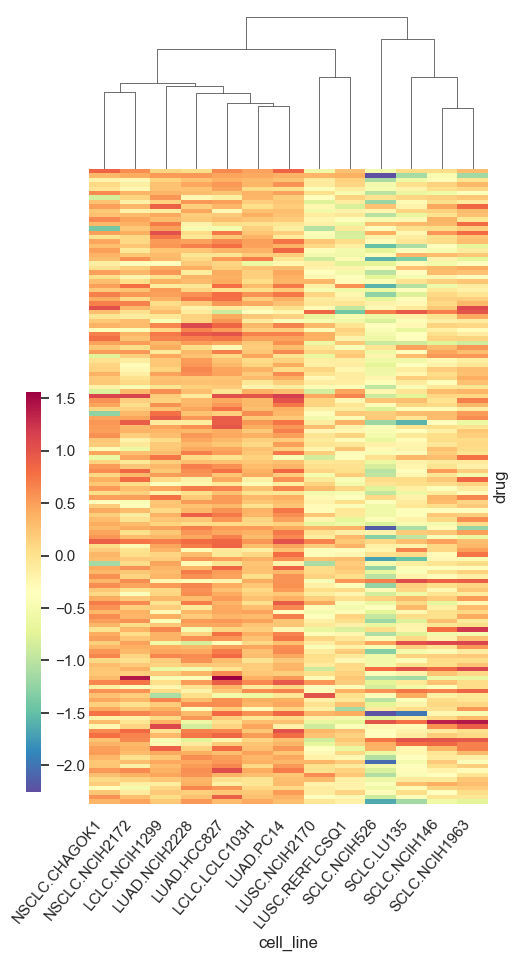

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
# iris = sns.load_dataset("iris")
# species = iris.pop("species")
# heatmap_data = pd.read_csv('heatmap_data.csv')
cell_line_names = df_LUNG_Filtered_ZScore_pivot.columns
heatmap_data = df_LUNG_Filtered_ZScore_pivot.iloc[:,0:]
#设置图片大小
g= sns.clustermap(heatmap_data,row_cluster=False,col_cluster=True, metric='euclidean',
                  fmt="d",cmap='Spectral_r',figsize=(5,10),
                  dendrogram_ratio=(.1, .2),
                    cbar_pos=(0, .2, .03, .4)
                  , yticklabels=False)
ax = g.ax_heatmap
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='left')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=50, horizontalalignment='right')
#设置图片名称，分辨率，并保存
# plt.savefig('cluster.tif',dpi = 300)
plt.show()